In [38]:
#Importing Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn import preprocessing
import seaborn as sns

#models for encoding
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

#for classificaion
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#for both regression and classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing other modules and libraries
from matplotlib.patches import Polygon
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report, cohen_kappa_score, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, max_error, explained_variance_score 
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, make_scorer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from statistics import mean, stdev


In [39]:
#changing the width for a more natural view

pd.set_option('display.width', 900)

In [40]:
# In this section, I will predict the quality of the wines with different ML model

# 1st - We still start by loading the white wine dataset here and cleaning the columns
w_wine = pd.read_csv("/Users/CAB Projects/1_My Projects/4_BlueBerry Winery/Data Set/winequality-white.csv", sep=";")

print(w_wine.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6
4            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6


In [41]:
# following common data science pratice and changing the coloumn nacmes

w_wine.columns = w_wine.columns.str.replace(' ', '_')
w_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [42]:
#Now we will split the dataset into two: one with 3 quality labels and the other with 4 quality labels

# This dataset will be transformed to include 3 quality labels
ww_3ql = w_wine.copy()

# This dataset will be transformed to include 4 quality labels
ww_4ql = w_wine.copy()

display(ww_3ql.head(5), ww_4ql.head(5))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [43]:
# Now I create a new column called "quality_label", define 3 ranges and associate each range with a label
ww_3ql["quality_label"] = ww_3ql["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value <= 7 else "high")

# now, I transform these labels into categorical data types (specific to pandas) instead of simple string
ww_3ql["quality_label"] = pd.Categorical(ww_3ql["quality_label"], 
categories = ["low", "medium", "high"])

display(ww_3ql.head(5), ww_3ql.tail(5))

#check the dataset basic stats
display(ww_3ql.info())
display(ww_3ql.describe())


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         4898 non-null   float64 
 1   volatile_acidity      4898 non-null   float64 
 2   citric_acid           4898 non-null   float64 
 3   residual_sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free_sulfur_dioxide   4898 non-null   float64 
 6   total_sulfur_dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  quality_label         4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


None

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [44]:
# Now I create a new column called "quality_label", define 4 ranges and associate each range with a label
ww_4ql["quality_label"] = ww_4ql["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value == 6 else "high" if value == 7 else "premium")

# now, I transform these labels into categorical data types (specific to pandas) instead of simple string
ww_4ql["quality_label"] = pd.Categorical(ww_4ql["quality_label"], 
categories = ["low", "medium", "high", "premium"])

#lets check our new dataset 
display(ww_4ql.head(5), ww_4ql.tail(5))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium


In [45]:
# Now I compare the frequency of the different qualities of wines in the different datasets
display("Quality distribution - 3labels", pd.DataFrame(ww_3ql["quality_label"].value_counts()).sort_index())

# let's check how many premium wines we actually have in the dataset
display("Quality distribution 4 labels", pd.DataFrame(ww_4ql["quality_label"].value_counts()).sort_index())

# based on the results below a grouping of the different qualities with 4 labels allows us to split the samples in a more evenly distributed way.

'Quality distribution - 3labels'

,quality_label
low,1640
medium,3078
high,180


'Quality distribution 4 labels'

,quality_label
low,1640
medium,2198
high,880
premium,180


In [46]:
# checking if the below formula produces labels for labeling pie and bar chart automatically
labels_3 = ww_3ql["quality_label"].cat.categories
labels_3

Index(['low', 'medium', 'high'], dtype='object')

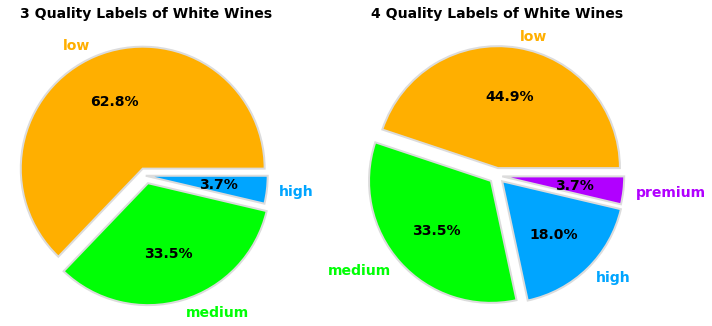

In [47]:
# Now I compare the frequency of the different qualities of wines in the different datasets in a pie chart
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10,10))
colors = plt.get_cmap("gist_rainbow")(np.linspace(0.16, 0.895, len(ww_4ql["quality_label"].value_counts())))
labels_3 = ww_3ql["quality_label"].cat.categories
labels_4 = ww_4ql["quality_label"].cat.categories


patches, texts, pcts = axs[0].pie(ww_3ql["quality_label"].value_counts(),
                        labels= labels_3,
                        colors=colors, 
                        explode= (0.07, 0.07, 0.0), 
                        autopct='%1.1f%%', 
                        radius=1.1,
                        wedgeprops= {"linewidth": 2, "edgecolor": "gainsboro"},
                        textprops= {"size": 14, "fontweight":"bold", "color": "black"})

for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())

patches, texts, pcts = axs[1].pie(ww_4ql["quality_label"].value_counts(), 
                        labels= labels_4, 
                        colors=colors, 
                        explode= (0.07, 0.07, 0.07, 0.05), 
                        autopct='%1.1f%%', 
                        radius= 1.1,
                        wedgeprops= {"linewidth": 2, "edgecolor": "gainsboro"},
                        textprops= {"size": 14, "fontweight":"bold", "color": "black"})

for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())

axs[0].set_title("3 Quality Labels of White Wines",{"size": 14, "fontweight":'bold', "color": "black"}, loc= "center", pad= 20)
axs[1].set_title("4 Quality Labels of White Wines", {"size": 14, "fontweight":'bold', "color": "black"}, loc= "center", pad= 20)

plt.tight_layout()

,3labels,4labels
,Frequency,Frequency
quality_label,,
low,1640.0,1640
medium,3078.0,2198
high,180.0,880
premium,NaN,180


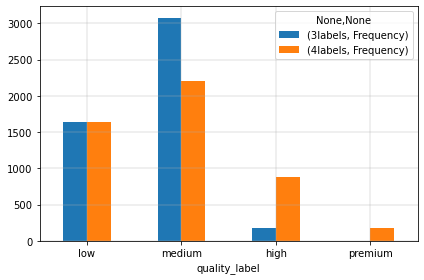

In [48]:
# let's create a single dataframe with the value counts and a bar chart for visualisation
ww_3ql_count = pd.DataFrame(ww_3ql["quality_label"].value_counts().sort_index().rename_axis("quality_label").reset_index(name="Frequency").set_index("quality_label"))
ww_4ql_count = pd.DataFrame(ww_4ql["quality_label"].value_counts().sort_index().rename_axis("quality_label").reset_index(name="Frequency").set_index("quality_label")) 
ql_count = pd.concat([ww_3ql_count, ww_4ql_count], axis=1, keys=["3labels", "4labels"])

display(ql_count) 

ql_count.plot.bar()
plt.xticks(rotation=0)
plt.grid(True, linewidth=0.4)
plt.tight_layout()

In [49]:
ww_3ql.iloc[:,:-1].head(5)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


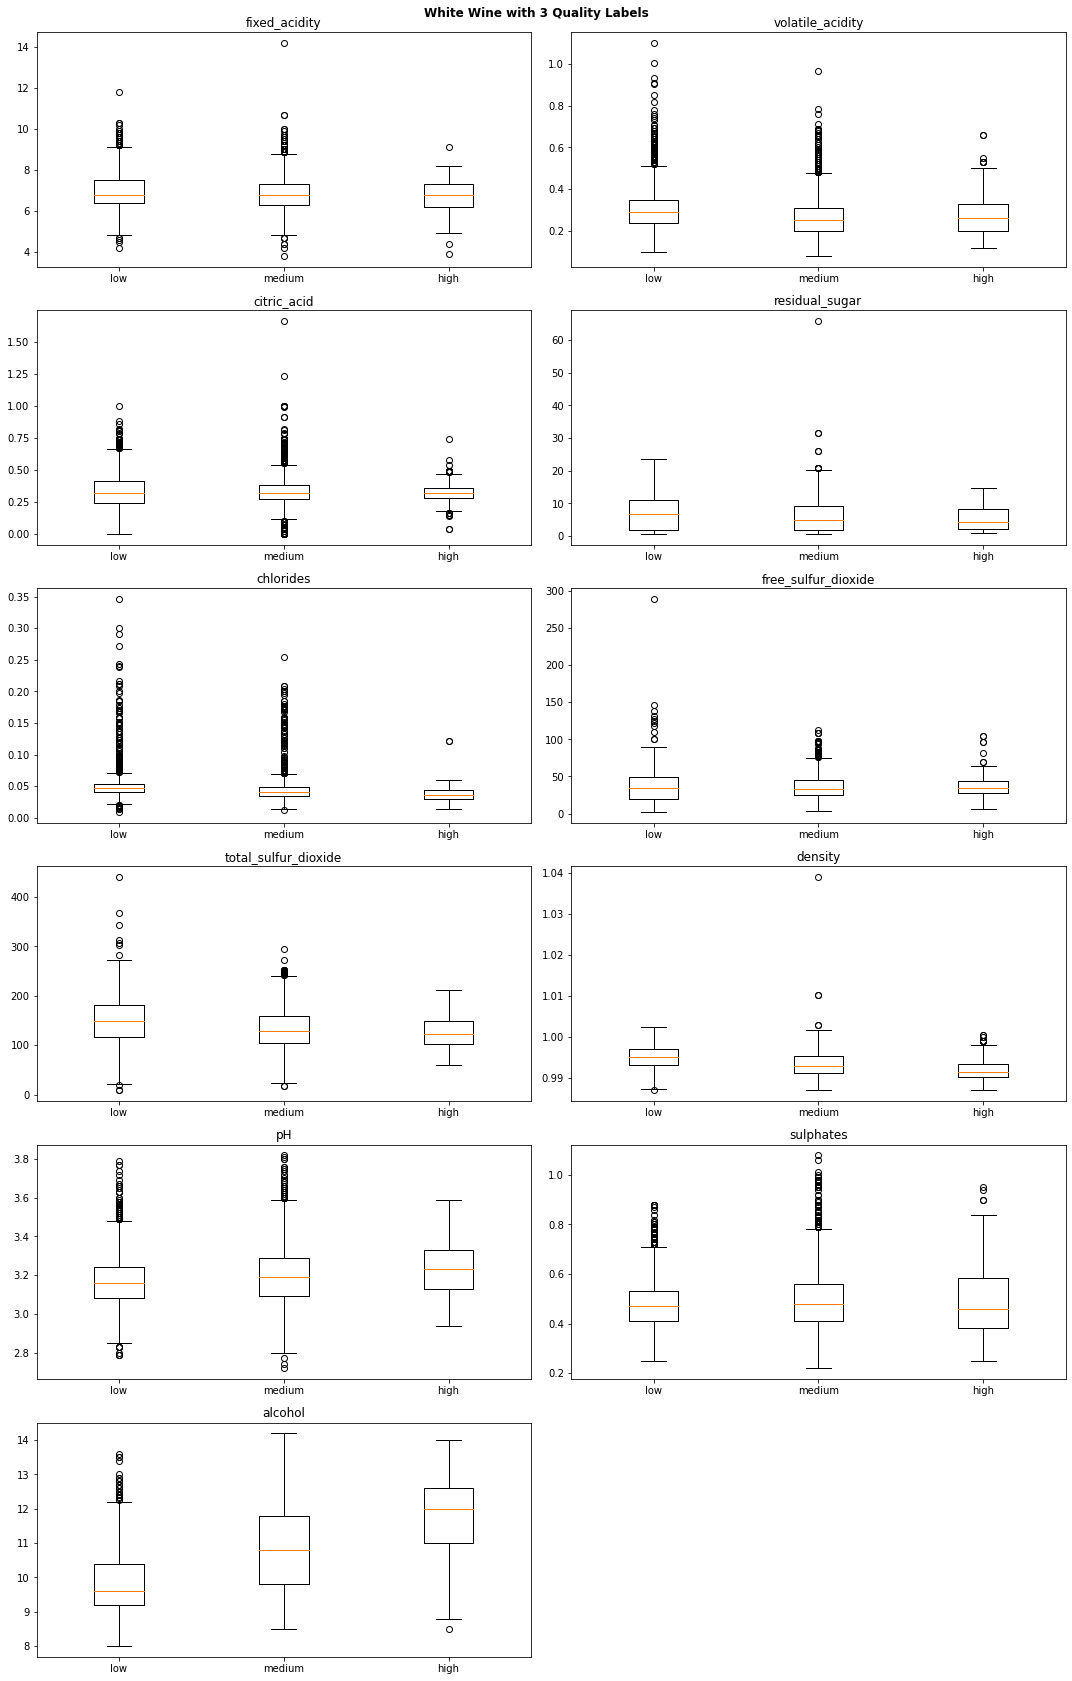

In [50]:
# Now we check for outliers in the different quality groups 

# First, using scatterplots for 3 labeled data:
count = 1
plt.figure(figsize= (15,35))
plt.suptitle("White Wine with 3 Quality Labels", weight= "demibold", x=0.5, y=0.99)
colors = ["CadetBlue", "Gold", "LimeGreen"]


for col in ww_3ql.iloc[:,:-2]:
    plt.subplot(9,2,count)
    bplot= plt.boxplot((
        ww_3ql[ww_3ql["quality_label"] == "low"][col],
        ww_3ql[ww_3ql["quality_label"] == "medium"][col],
        ww_3ql[ww_3ql["quality_label"] == "high"][col]),
        labels= labels_3
        )
    plt.title(col, {"size": 12, "fontweight":'medium', "color": "black"})
    count+=1

plt.tight_layout()

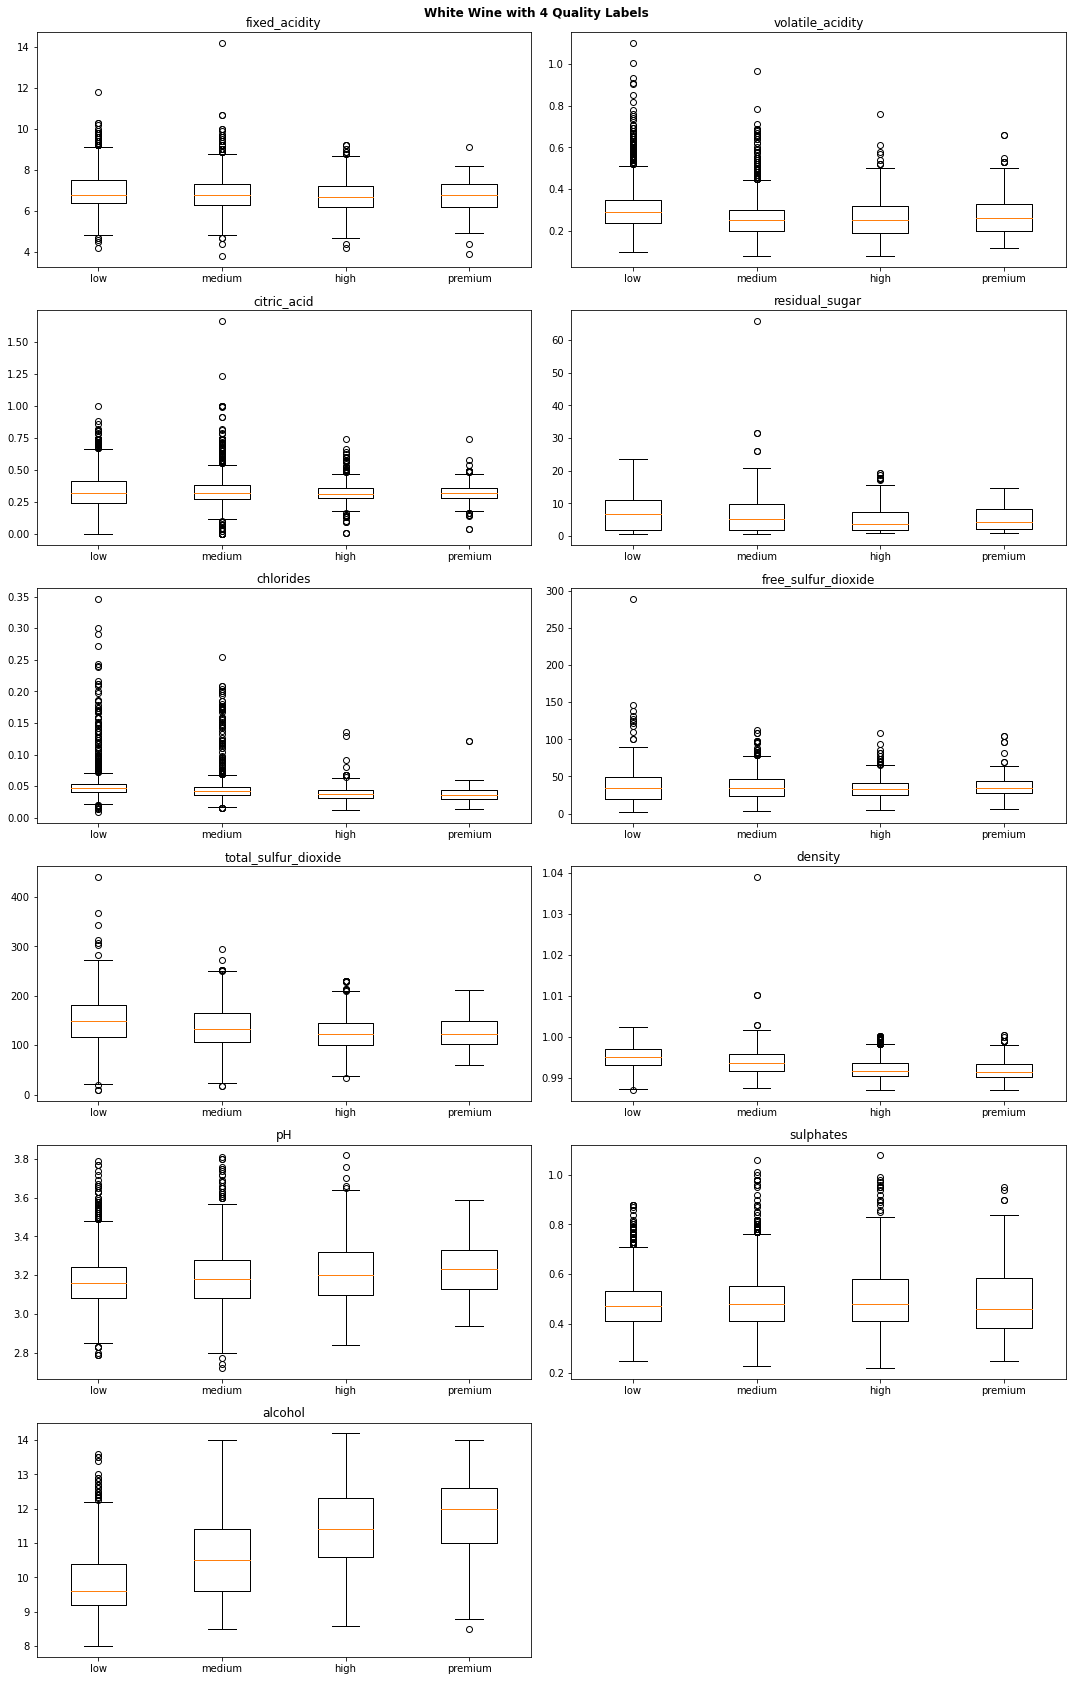

In [51]:
# Now we check for outliers in the different quality groups 

# First, using scatterplots for 4 labeled data:
count = 1
plt.figure(figsize= (15,35))
plt.suptitle("White Wine with 4 Quality Labels", weight= "demibold", x=0.5, y=0.99)
colors = ["CadetBlue", "Gold", "LimeGreen"]


for col in ww_4ql.iloc[:,:-2]:
    plt.subplot(9,2,count)
    bplot= plt.boxplot((
        ww_4ql[ww_4ql["quality_label"] == "low"][col],
        ww_4ql[ww_4ql["quality_label"] == "medium"][col],
        ww_4ql[ww_4ql["quality_label"] == "high"][col],
        ww_4ql[ww_4ql["quality_label"] == "premium"][col]),
        labels= labels_4
        )
    plt.title(col, {"size": 12, "fontweight":'medium', "color": "black"})
    count+=1

plt.tight_layout()

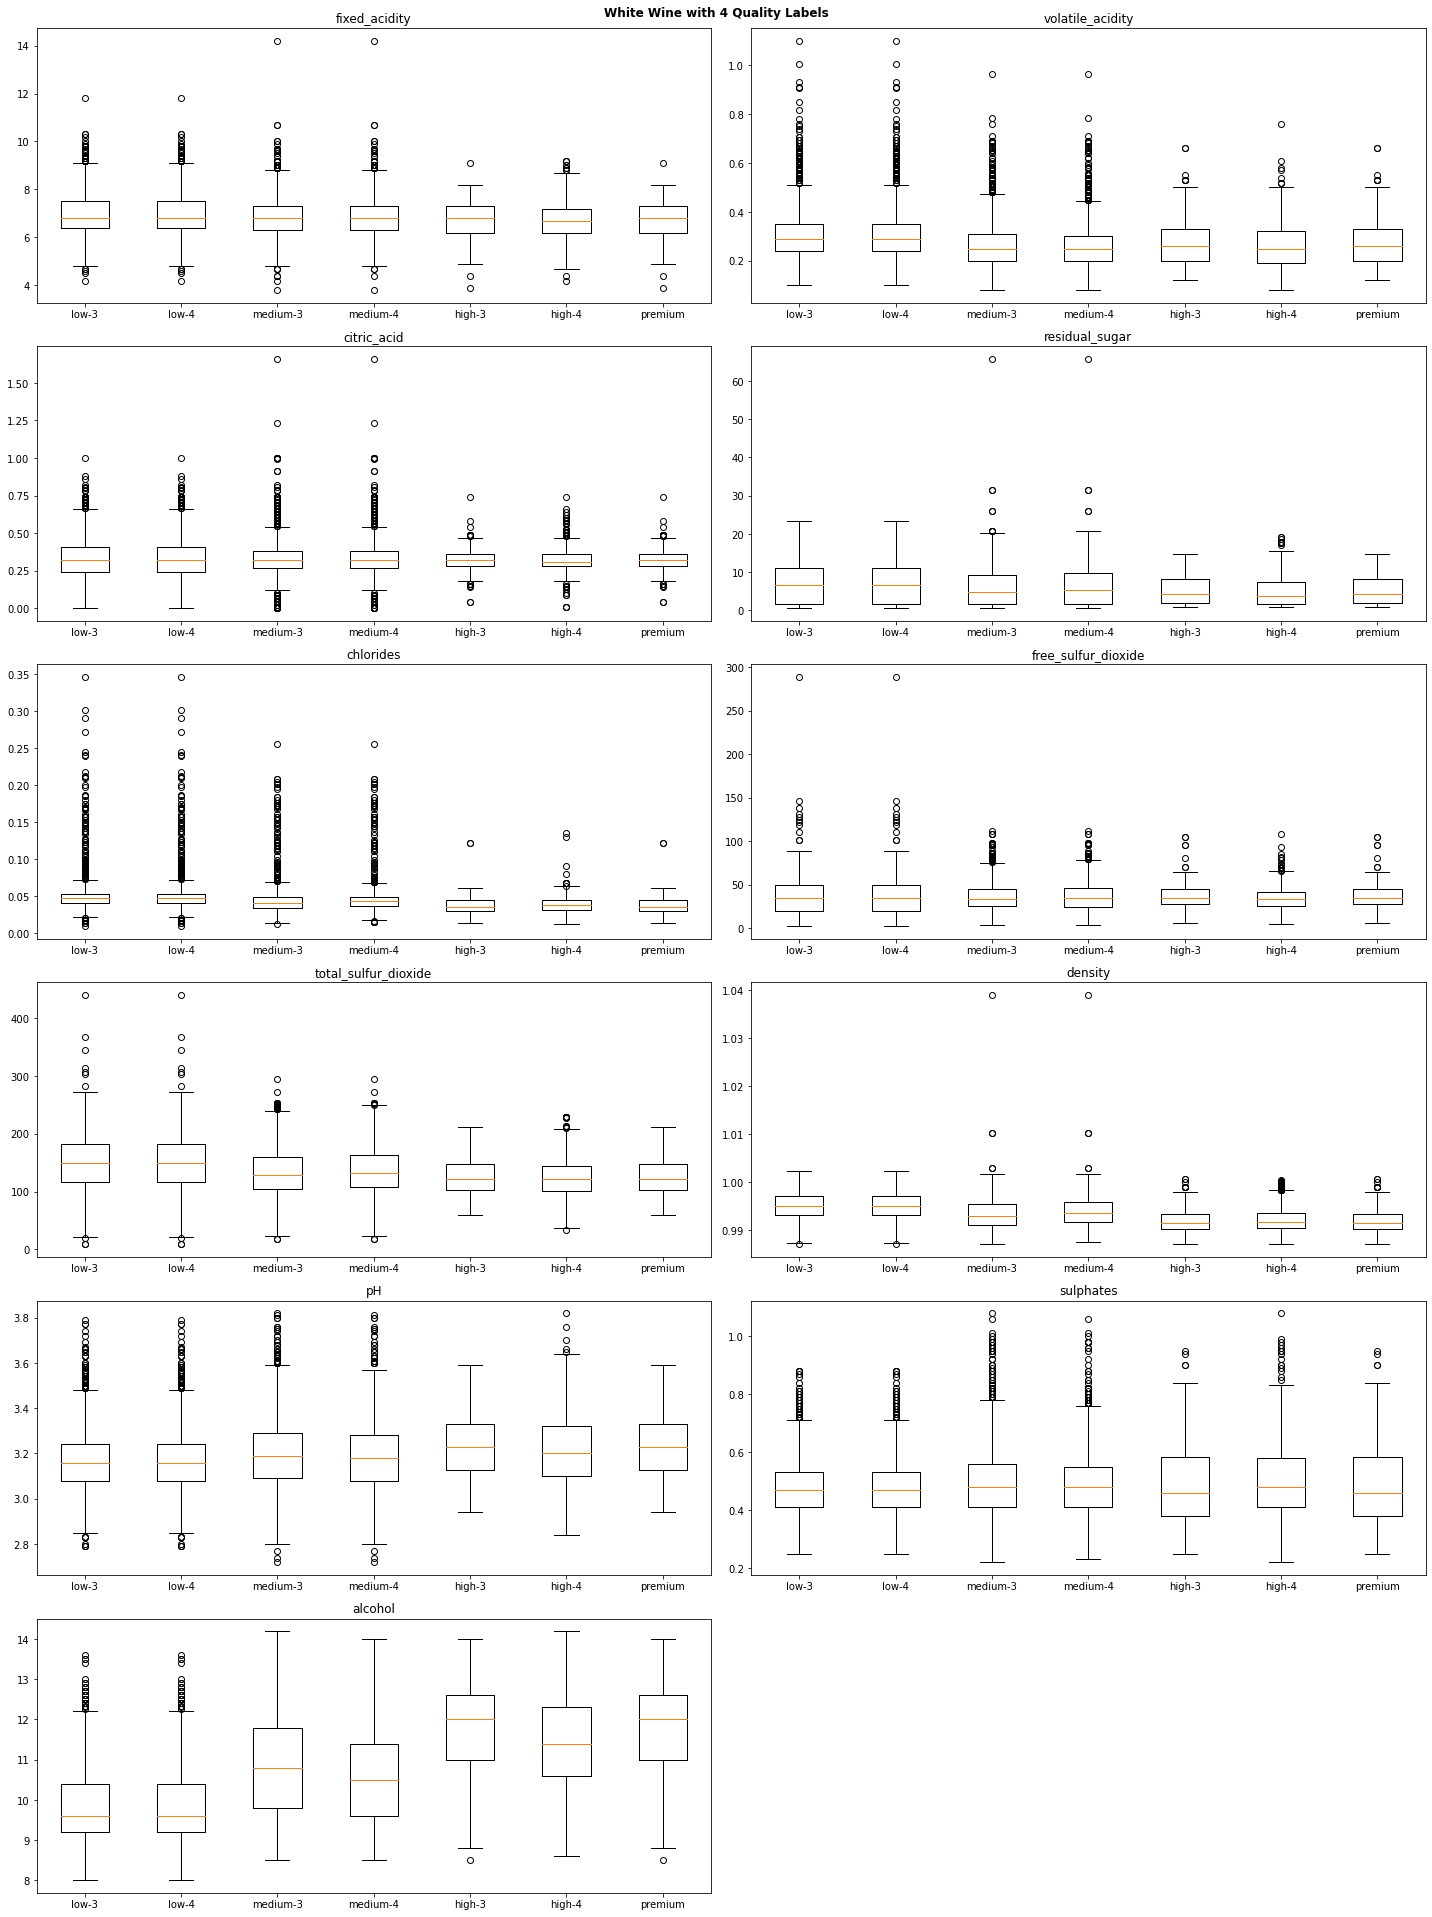

In [52]:
# Now we check for outliers in the different quality groups next to each other

# First, using scatterplots for 4 labeled data:
count = 1
plt.figure(figsize= (20,40))
plt.suptitle("White Wine with 4 Quality Labels", weight= "demibold", x=0.5, y=0.99)
colors = ["CadetBlue", "Gold", "LimeGreen"]
labels_5 = ['low-3','low-4', 'medium-3','medium-4', 'high-3','high-4', "premium"]

for col in ww_4ql.iloc[:,:-2]:
    plt.subplot(9,2,count)
    plt.boxplot((
        ww_3ql[ww_3ql["quality_label"] == "low"][col],
        ww_4ql[ww_4ql["quality_label"] == "low"][col],
        ww_3ql[ww_3ql["quality_label"] == "medium"][col],
        ww_4ql[ww_4ql["quality_label"] == "medium"][col],
        ww_3ql[ww_3ql["quality_label"] == "high"][col],
        ww_4ql[ww_4ql["quality_label"] == "high"][col],
        ww_4ql[ww_4ql["quality_label"] == "premium"][col]),
        labels=labels_5)

    plt.title(col, {"size": 12, "fontweight":'medium', "color": "black"})
    count+=1

plt.tight_layout()

In [53]:
ww_3ql.iloc[:,:-1].head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [54]:
# Now the statistics show begins :D

# applying ANOVA to prove if mean alcohol level vary significantly among the low quality, medium quality and high quality wines?

for (X) in ww_3ql.iloc[:,:-2]:
    F, p = stats.f_oneway(ww_3ql[ww_3ql['quality_label'] == 'low'][X],
    ww_3ql[ww_3ql['quality_label'] == 'medium'][X],
    ww_3ql[ww_3ql['quality_label'] == 'high'][X])
    print("ANOVA test for mean", X, "across all wines with different quality ratings")
    print('F Statistic:', F, '\tp-value:', p, "\n")

ANOVA test for mean fixed_acidity across all wines with different quality ratings
F Statistic: 21.923026494425756 	p-value: 3.321537387880916e-10 

ANOVA test for mean volatile_acidity across all wines with different quality ratings
F Statistic: 133.6668084396585 	p-value: 3.012823078922054e-57 

ANOVA test for mean citric_acid across all wines with different quality ratings
F Statistic: 0.23254245986965996 	p-value: 0.7925248530727159 

ANOVA test for mean residual_sugar across all wines with different quality ratings
F Statistic: 21.934773835107606 	p-value: 3.2830889157949124e-10 

ANOVA test for mean chlorides across all wines with different quality ratings
F Statistic: 90.87064418602546 	p-value: 1.7797433543986758e-39 

ANOVA test for mean free_sulfur_dioxide across all wines with different quality ratings
F Statistic: 0.5909833608324854 	p-value: 0.5538219567015075 

ANOVA test for mean total_sulfur_dioxide across all wines with different quality ratings
F Statistic: 76.66028143

In [55]:
for (X) in ww_4ql.iloc[:,:-2]:
    F, p = stats.f_oneway(
        ww_4ql[ww_4ql['quality_label'] == 'low'][X],
        ww_4ql[ww_4ql['quality_label'] == 'medium'][X],
        ww_4ql[ww_4ql['quality_label'] == 'high'][X],
        ww_4ql[ww_4ql['quality_label'] == 'premium'][X])
    print("ANOVA test for mean", X, "across all wines with different quality ratings")
    print('F Statistic:', F, '\tp-value:', p, "\n")

ANOVA test for mean fixed_acidity across all wines with different quality ratings
F Statistic: 17.790562174947635 	p-value: 1.755691967989088e-11 

ANOVA test for mean volatile_acidity across all wines with different quality ratings
F Statistic: 89.20422115904348 	p-value: 3.370028555771532e-56 

ANOVA test for mean citric_acid across all wines with different quality ratings
F Statistic: 2.356332980607983 	p-value: 0.06986638384671134 

ANOVA test for mean residual_sugar across all wines with different quality ratings
F Statistic: 27.774541837997024 	p-value: 8.368534159597376e-18 

ANOVA test for mean chlorides across all wines with different quality ratings
F Statistic: 84.18385157999884 	p-value: 4.180546165598879e-53 

ANOVA test for mean free_sulfur_dioxide across all wines with different quality ratings
F Statistic: 2.0796966268458466 	p-value: 0.10068700914283754 

ANOVA test for mean total_sulfur_dioxide across all wines with different quality ratings
F Statistic: 68.8352682588

In [56]:
F_stats = []
p_vals = []

for (X) in ww_3ql.iloc[:,:-2]:
    F_stat, p_val = stats.f_oneway(
        ww_3ql[ww_3ql['quality_label'] == 'low'][X],
        ww_3ql[ww_3ql['quality_label'] == 'medium'][X],
        ww_3ql[ww_3ql['quality_label'] == 'high'][X],
    )

    F_stats.append(F_stat)
    p_vals.append(p_val)

    Values1 = pd.DataFrame(F_stats)
    Values2 = pd.DataFrame(p_vals)

idx= ("fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol")

Values_3ql = pd.concat([Values1,Values2], axis=1, keys=["F_Statistic - 3l", "p Value - 3l"]).set_axis(idx)

display(Values_3ql)

,F_Statistic - 3l,p Value - 3l
,0,0
fixed_acidity,21.923026,3.321537e-10
volatile_acidity,133.666808,3.012823e-57
citric_acid,0.232542,7.925249e-01
residual_sugar,21.934774,3.283089e-10
chlorides,90.870644,1.779743e-39
free_sulfur_dioxide,0.590983,5.538220e-01
total_sulfur_dioxide,76.660281,1.650542e-33
density,209.694577,4.194132e-88
pH,19.690946,3.037721e-09


In [57]:
F_stats = []
p_vals = []

for (X) in ww_4ql.iloc[:,:-2]:
    F_stat, p_val = stats.f_oneway(
        ww_4ql[ww_4ql['quality_label'] == 'low'][X],
        ww_4ql[ww_4ql['quality_label'] == 'medium'][X],
        ww_4ql[ww_4ql['quality_label'] == 'high'][X],
        ww_4ql[ww_4ql['quality_label'] == 'premium'][X])

    F_stats.append(F_stat)
    p_vals.append(p_val)

    Values1 = pd.DataFrame(F_stats)
    Values2 = pd.DataFrame(p_vals)

idx= ("fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol")

Values_4ql = pd.concat([Values1,Values2], axis=1, keys=["F_Statistic -4l", "p Value - 4l"]).set_axis(idx)

display(Values_4ql)


,F_Statistic -4l,p Value - 4l
,0,0
fixed_acidity,17.790562,1.755692e-11
volatile_acidity,89.204221,3.370029e-56
citric_acid,2.356333,6.986638e-02
residual_sugar,27.774542,8.368534e-18
chlorides,84.183852,4.180546e-53
free_sulfur_dioxide,2.079697,1.006870e-01
total_sulfur_dioxide,68.835268,1.351121e-43
density,204.882774,3.481972e-125
pH,19.117608,2.538262e-12


In [58]:
Anova_Values = pd.concat([Values_3ql, Values_4ql], axis = 1)

display(Anova_Values)

# there are only slight differences between the means of the groups looking at the F statistic. 4 labels and 3 labels don't really make a big difference.
# However the difference within groups is notably smaller for fixed acidity, Volatile Acidity, Cholrides, total SO4 and alcohol
# On the other hand, the difference between quality groups is higher in 4 labels for  citric acid, residual sugar, free SO4

,F_Statistic - 3l,p Value - 3l,F_Statistic -4l,p Value - 4l
,0,0,0,0
fixed_acidity,21.923026,3.321537e-10,17.790562,1.755692e-11
volatile_acidity,133.666808,3.012823e-57,89.204221,3.370029e-56
citric_acid,0.232542,7.925249e-01,2.356333,6.986638e-02
residual_sugar,21.934774,3.283089e-10,27.774542,8.368534e-18
chlorides,90.870644,1.779743e-39,84.183852,4.180546e-53
free_sulfur_dioxide,0.590983,5.538220e-01,2.079697,1.006870e-01
total_sulfur_dioxide,76.660281,1.650542e-33,68.835268,1.351121e-43
density,209.694577,4.194132e-88,204.882774,3.481972e-125
pH,19.690946,3.037721e-09,19.117608,2.538262e-12


In [59]:
# Now we check for outliers
# Checking for outliers with skewness
#Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.
print("Identifying Outliers with Skewness")

display(w_wine.iloc[:,:12].skew())

# For White Wines:
# based on the skewness value, for White wines, the chlorides feature indicates the presence of extreme values on the right.
# whereas, the ff. features are also skewed,albeit not extreme: free SO4, volatile acidity, citric acid

Identifying Outliers with Skewness


fixed_acidity           0.647751
volatile_acidity        1.576980
citric_acid             1.281920
residual_sugar          1.077094
chlorides               5.023331
free_sulfur_dioxide     1.406745
total_sulfur_dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

In [60]:
# Checking for outliers with kurtosis
print("Identifying Outliers with Kurtosis")

print(w_wine.iloc[:,:12].kurt())

# Kurtosis is used to find the vertical pull or the peak's height
# Expected Kurtosis is 3 - the greater, the higher the peak
# High outlier frequency for in White Wines:Chlorides and free SO4, density, citric acid


Identifying Outliers with Kurtosis
fixed_acidity            2.172178
volatile_acidity         5.091626
citric_acid              6.174901
residual_sugar           3.469820
chlorides               37.564600
free_sulfur_dioxide     11.466342
total_sulfur_dioxide     0.571853
density                  9.793807
pH                       0.530775
sulphates                1.590930
alcohol                 -0.698425
quality                  0.216526
dtype: float64


Text(0, 0.5, 'Frequency')

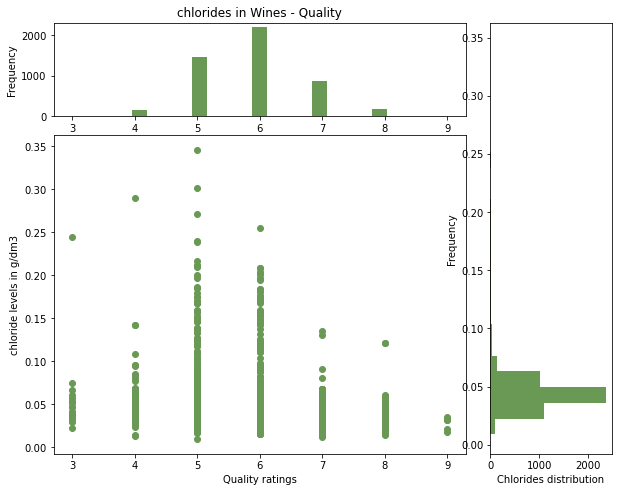

In [61]:
# we check the relationship between chlorides and quality

fig = plt.figure(figsize= (10,10))
gs = GridSpec(5,4)

ax_scatter = fig.add_subplot(gs[2:5, 0:3])
ax_hist_y = fig.add_subplot(gs[1,0:3])
ax_hist_x = fig.add_subplot(gs[1:5,3])

ax_scatter.scatter(ww_3ql["quality"], ww_3ql["chlorides"], color='#6A9955')
ax_scatter.set_xlabel("Quality ratings")
ax_scatter.set_ylabel("chloride levels in g/dm3")

ax_hist_y.hist(ww_3ql["quality"],bins=25, color='#6A9955')
ax_hist_y.set_ylabel("Frequency")
ax_hist_y.set_title("chlorides in Wines - Quality")


ax_hist_x.hist(ww_3ql["chlorides"],bins=25, color='#6A9955', orientation= "horizontal")
ax_hist_x.set_xlabel("Chlorides distribution")
ax_hist_x.set_ylabel("Frequency")

# there sem to be a relationship between chloride levels and the quality as seen below in the graph

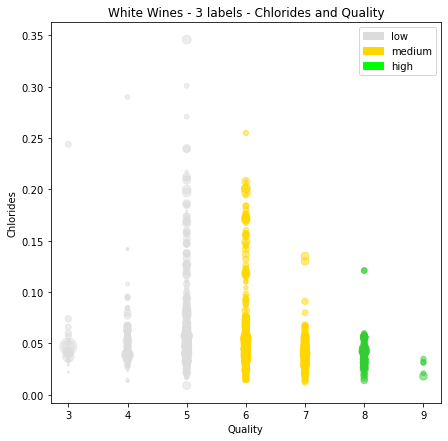

In [62]:
# we check th relationship between chlorides and quality

colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(
    ww_3ql["quality"], 
    ww_3ql["chlorides"], ww_3ql["free_sulfur_dioxide"], 
    c=ww_3ql["quality_label"].map(colors), alpha=0.5)

ax.set_xlabel("Quality", fontsize=10)
ax.set_ylabel("Chlorides", fontsize=10)
ax.set_title('White Wines - 3 labels - Chlorides and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='Lime', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])

plt.show()

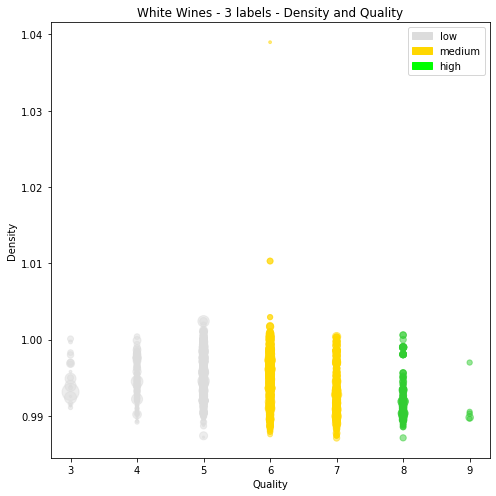

In [63]:
# we check th relationship between density and quality

colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter(
    ww_3ql["quality"], 
    ww_3ql["density"], ww_3ql["free_sulfur_dioxide"], 
    c=ww_3ql["quality_label"].map(colors), alpha=0.5)

ax.set_xlabel("Quality", fontsize=10)
ax.set_ylabel("Density", fontsize=10)
ax.set_title('White Wines - 3 labels - Density and Quality')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='Lime', label='high')

ax.legend(handles=[low_quality, medium_quality, high_quality])
plt.tight_layout()

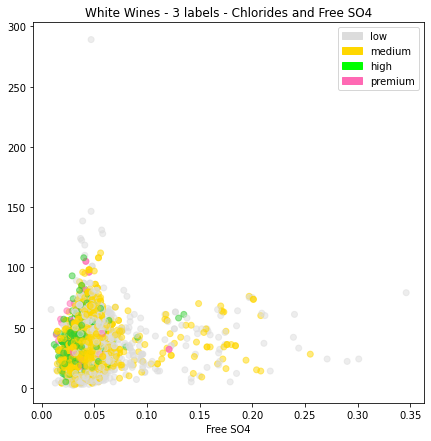

In [64]:
# we check th relationship between chlorides and Free SO4

colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen", "premium": "Hotpink"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter( 
    ww_4ql["chlorides"], 
    ww_4ql["free_sulfur_dioxide"], 
    c=ww_4ql["quality_label"].map(colors), alpha=0.5)

ax.set_xlabel("Chlorides", fontsize=10)
ax.set_xlabel("Free SO4", fontsize=10)
ax.set_ylabel("", fontsize=10)
ax.set_title('White Wines - 3 labels - Chlorides and Free SO4')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='Lime', label='high')
premium_quality = mpatches.Patch(color='Hotpink', label='premium')


ax.legend(handles=[low_quality, medium_quality, high_quality, premium_quality])

plt.show()

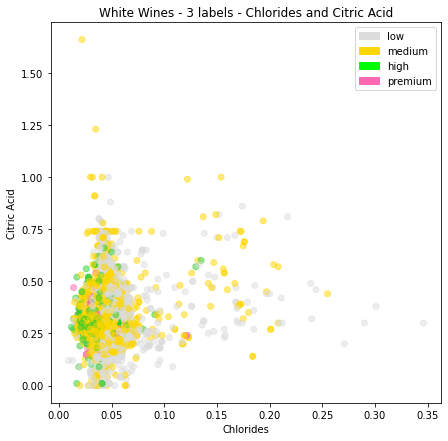

In [65]:
# we check th relationship between chlorides and Citric Acidity

colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen", "premium": "Hotpink"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter( 
    ww_4ql["chlorides"], 
    ww_4ql["citric_acid"], 
    c=ww_4ql["quality_label"].map(colors), alpha=0.5)

ax.set_xlabel("Chlorides", fontsize=10)
ax.set_ylabel("Citric Acid", fontsize=10)
ax.set_title('White Wines - 3 labels - Chlorides and Citric Acid')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='Lime', label='high')
premium_quality = mpatches.Patch(color='Hotpink', label='premium')


ax.legend(handles=[low_quality, medium_quality, high_quality, premium_quality])

plt.show()

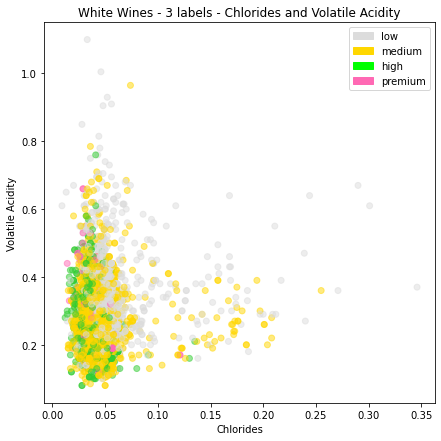

In [66]:
# we check th relationship between chlorides and Volatile Acidity

colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen", "premium": "Hotpink"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter( 
    ww_4ql["chlorides"], 
    ww_4ql["volatile_acidity"], 
    c=ww_4ql["quality_label"].map(colors), alpha=0.5)

ax.set_xlabel("Chlorides", fontsize=10)
ax.set_ylabel("Volatile Acidity", fontsize=10)
ax.set_title('White Wines - 3 labels - Chlorides and Volatile Acidity')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='Lime', label='high')
premium_quality = mpatches.Patch(color='Hotpink', label='premium')


ax.legend(handles=[low_quality, medium_quality, high_quality, premium_quality])

plt.show()

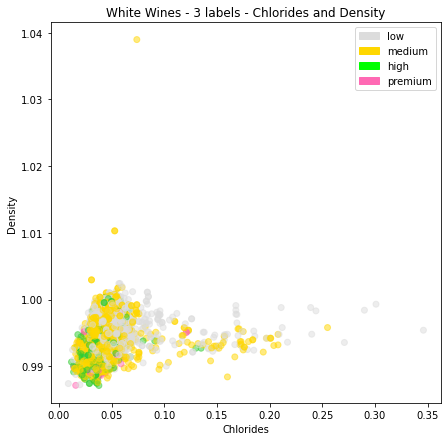

In [67]:
# we check th relationship between chlorides and density

colors = {"low": "Gainsboro", "medium": "Gold", "high": "LimeGreen", "premium": "Hotpink"} 

fig, ax = plt.subplots(figsize = (7,7))
scatter = ax.scatter( 
    ww_4ql["chlorides"], 
    ww_4ql["density"], 
    c=ww_4ql["quality_label"].map(colors), alpha=0.5)

ax.set_xlabel("Chlorides", fontsize=10)
ax.set_ylabel("Density", fontsize=10)
ax.set_title('White Wines - 3 labels - Chlorides and Density')

low_quality = mpatches.Patch(color='Gainsboro', label='low')
medium_quality = mpatches.Patch(color='Gold', label='medium')
high_quality = mpatches.Patch(color='Lime', label='high')
premium_quality = mpatches.Patch(color='Hotpink', label='premium')


ax.legend(handles=[low_quality, medium_quality, high_quality, premium_quality])

plt.show()

In [68]:
# The above scatterplots suggest that the most outliers are in the medium and low quality groups when comparing chlorides with other features

In [69]:
#The code below generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.
# For white wines
table = pd.DataFrame([])

#Identifying Outliers with Interquartile Range (IQR)
Q1_w = w_wine.quantile(0.25)
Q3_w = w_wine.quantile(0.75)
IQR_w = (Q3_w - Q1_w).round(2)

#For the combined white wines dataset
Outlier_ww = (w_wine.iloc[:,:12] < (Q1_w - 1.5 * IQR_w)) | (w_wine.iloc[:,:12] > (Q3_w + 1.5 * IQR_w))

# Now we count how many outliers we have for each feature
for col in Outlier_ww.columns:
   table= pd.concat([Outlier_ww[col].value_counts()], axis=1)

display(table)

#lets figure out how to store in a dataframe from a for loop

,quality
False,4698
True,200


In [70]:
# now we weill prepare our data for the ML models
#First, I will label encode the quality column

#I will make a copy of the dataset
enc_3ql = ww_3ql.copy()

# Here we define our Encoder and give it an alias
le= LabelEncoder()

# now we transform the quality column variables into ordinal values and add the column to the dataframe
enc_3ql["Encoded"] = le.fit_transform(enc_3ql["quality_label"])

#checking the output of the encoder
display(enc_3ql.sample(5, random_state=42))

# encoded class labels
classes = list(le.classes_)

# now I check the encoded columns
Encoded_freq = enc_3ql["Encoded"].value_counts().to_frame().sort_index()
Encoded_view = Encoded_freq.assign(class_labels=classes)
display(Encoded_view)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,Encoded
4656,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7,medium,2
3659,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8,high,0
907,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8,high,0
4352,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5,low,1
3271,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7,medium,2


,Encoded,class_labels
0,180,high
1,1640,low
2,3078,medium


--------------------------------------------------------
checking input variables
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1 

--------------------------------------------------------
checking output variables
0    2
1    2
2    2
Name: Encoded, dtype: int64 

--------------------------------------------------------
checking the accuracy of our model
List of possible accuracy: [0.7085714285714285, 0.7371428571428571, 0.69571428

/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


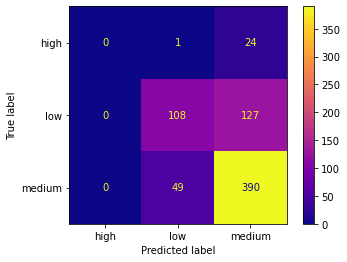

In [71]:
# After successfully encoding the labels, I will no drop unnecessary columns and check the output
#Since we have an imbalance dataset, we want to take the ratios into account when sampling and thus try the Stratified Kfold split function below to predic red or white wines

# And now we split the dataset into input and output, whereby X = input and Y = output
X = enc_3ql.iloc[:,:-3]
Y = enc_3ql.iloc[:,-1]

# Here we check our input and output variables
print("--------------------------------------------------------")
print("checking input variables")
print(X.head(3), "\n") 

print("--------------------------------------------------------")
print("checking output variables")
print(Y.head(3), "\n")

# Everything is working as expected. So we move on

#defining the classification model
lr = LogisticRegression()

# Now we create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

accu_score = []

# Now we are ready to use the function to create our folds
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    #Now its time to normalise our input features with normalisation technique
    scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    lr.fit(X_train_scaled, Y_train)
    Y_predict = lr.predict(X_test_scaled)

    accuracy = accuracy_score(Y_predict, Y_test)
    accu_score.append(accuracy) 

# Printing the results
print("--------------------------------------------------------")
print("checking the accuracy of our model")

print('List of possible accuracy:', accu_score)

print('\nMaximum Accuracy That can be obtained from this model is:',max(accu_score)*100, '%')

print('\nMinimum Accuracy:', min(accu_score)*100, '%')

print('\nOverall Accuracy (mean):', np.mean(accu_score)*100, '%',"\n")

print("--------------------------------------------------------")
print("The Classificaion Report for our model:")
print(classification_report(Y_test, Y_predict, target_names=["high", "low", "medium"]),"\n")

print("--------------------------------------------------------")
kappa = cohen_kappa_score(Y_test, Y_predict)
print("Cohen-Kappa score:", kappa, "\n")

print("--------------------------------------------------------")
# Now we want to visualize the Confusion Matrix
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(Y_test, Y_predict, display_labels= ["high", "low", "medium"] ,colorbar= True, cmap="plasma")


# place holder for metrics for regression: r2_score, explained_variance_score, mean_absolute_error, max_error,
# The r2_score function: Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn

,Precision,Recall,f1,Accuracy,Cohen
LR,0.667200,0.699571,0.699571,0.699571,0.699571
SVM,0.680546,0.711016,0.711016,0.711016,0.711016
D-Trees,0.730349,0.728183,0.728183,0.728183,0.728183
R-Forest,0.835960,0.832618,0.832618,0.832618,0.832618
Naive Bayes,0.641153,0.652361,0.652361,0.652361,0.652361
K-Nearest,0.727294,0.742489,0.742489,0.742489,0.742489
Neural Network,0.712681,0.742489,0.742489,0.742489,0.742489


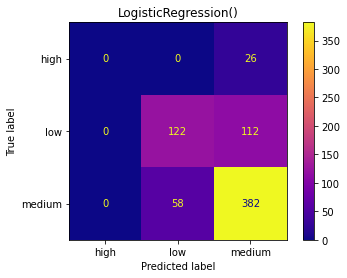

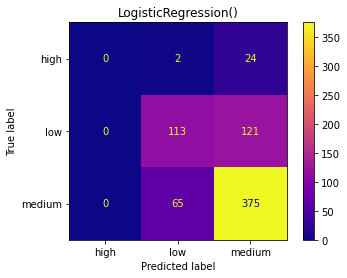

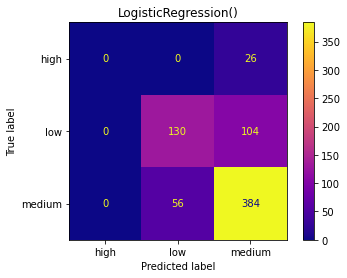

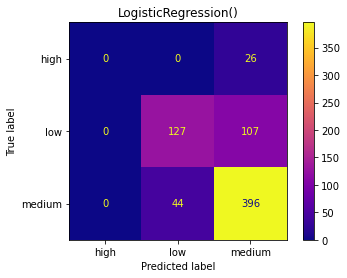

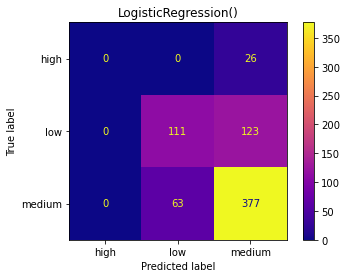

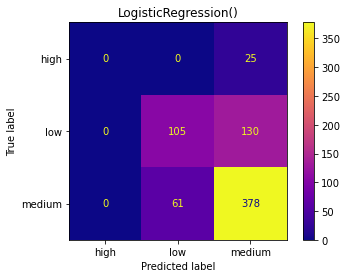

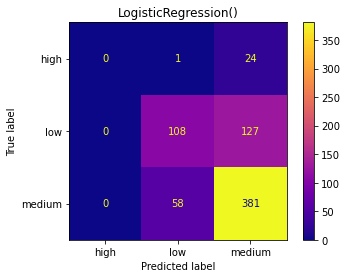

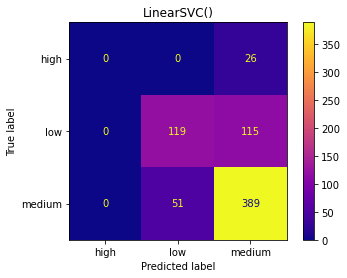

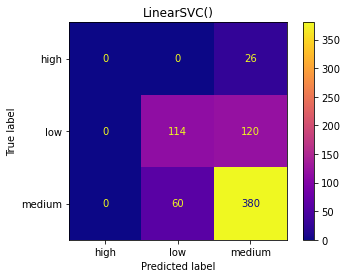

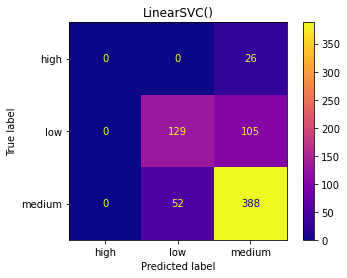

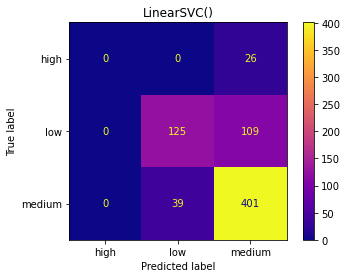

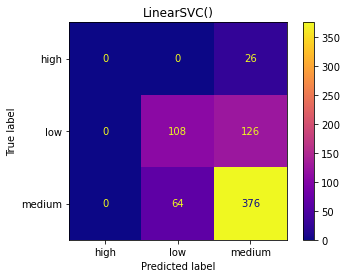

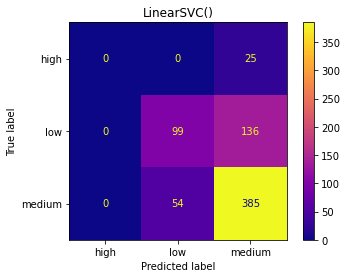

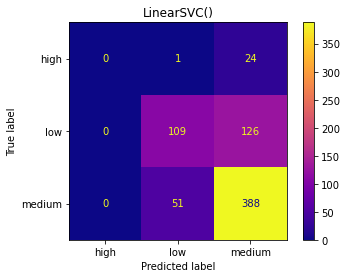

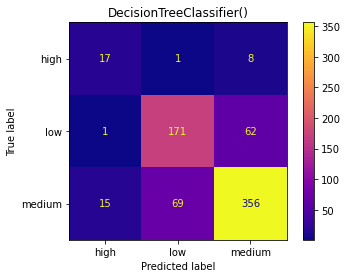

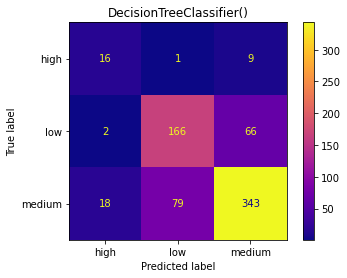

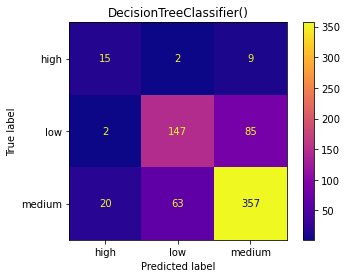

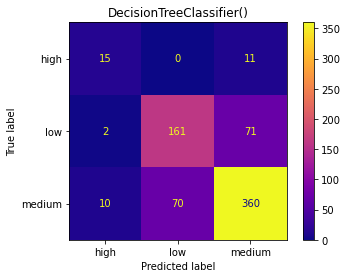

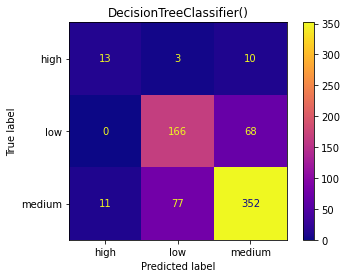

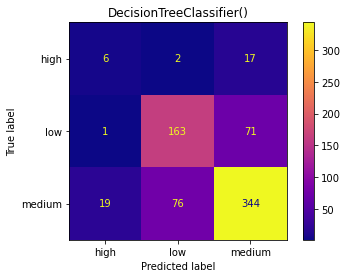

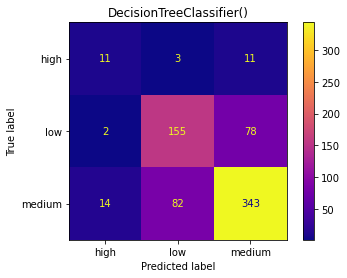

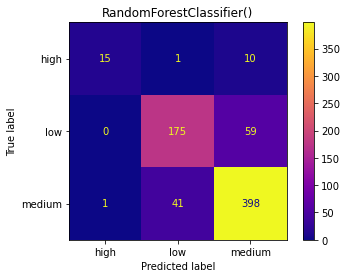

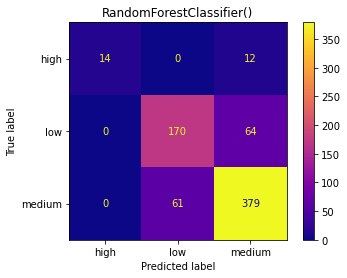

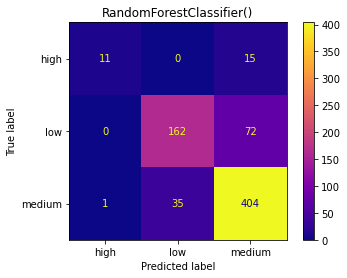

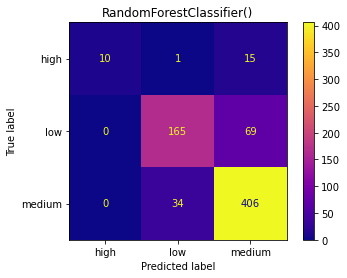

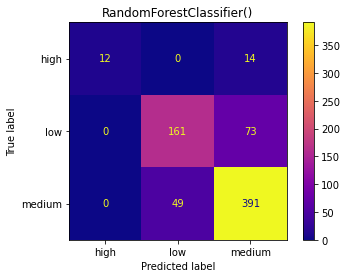

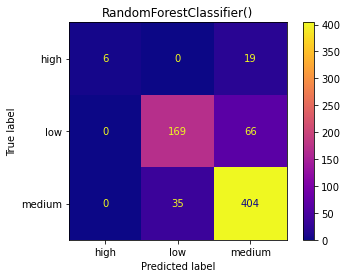

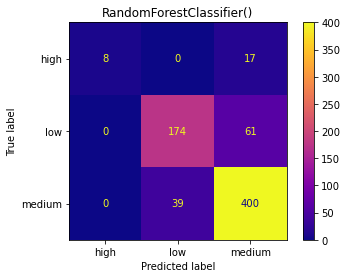

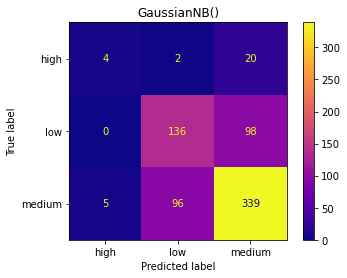

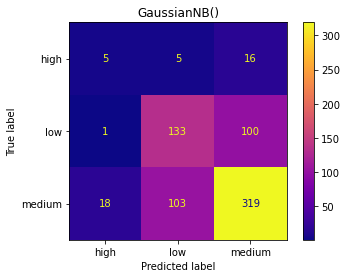

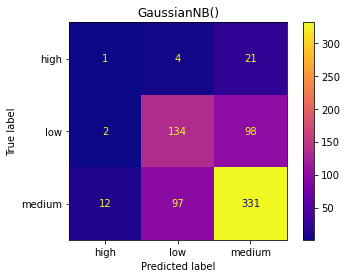

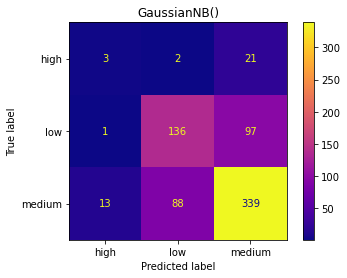

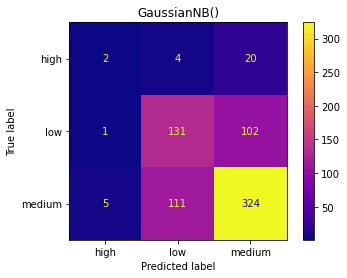

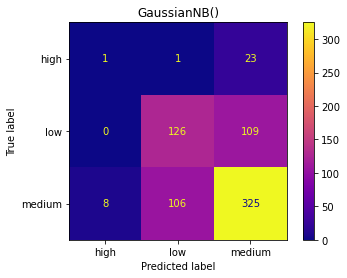

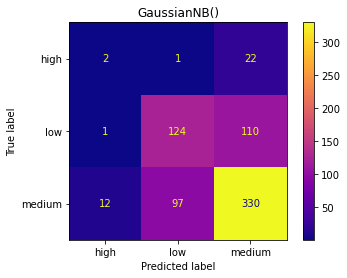

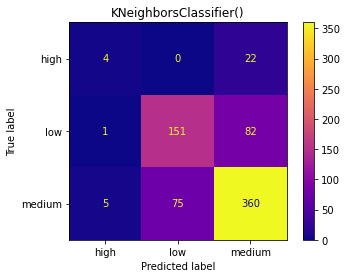

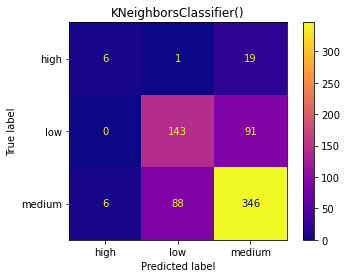

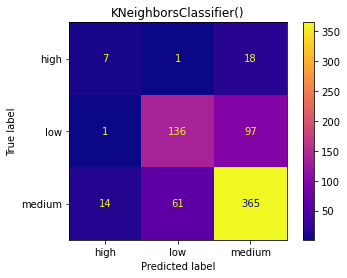

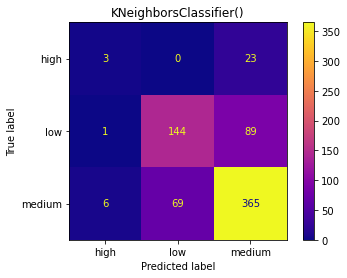

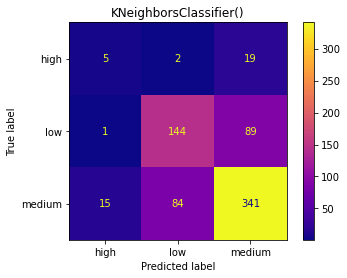

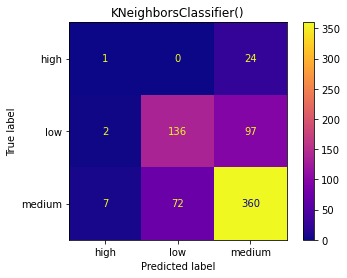

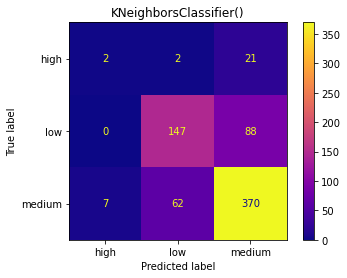

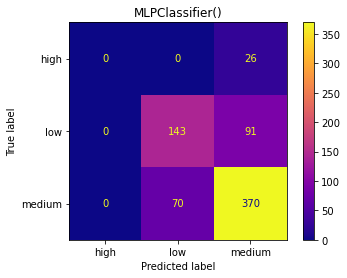

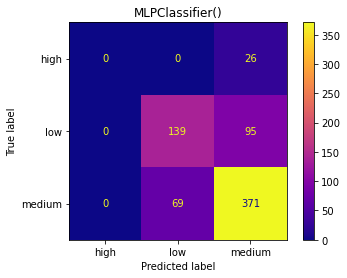

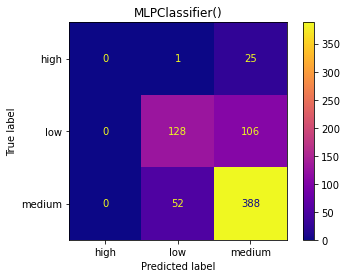

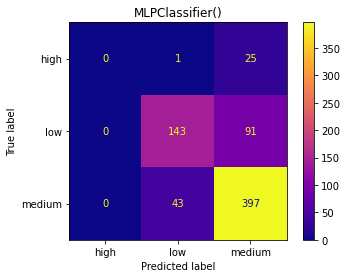

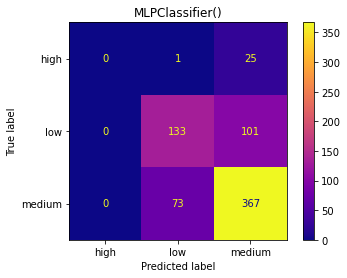

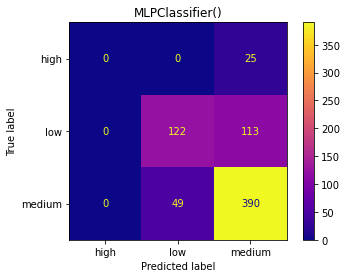

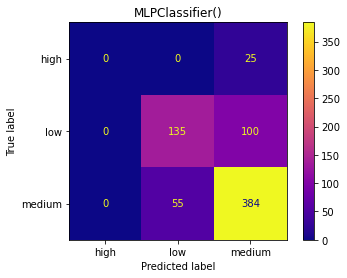

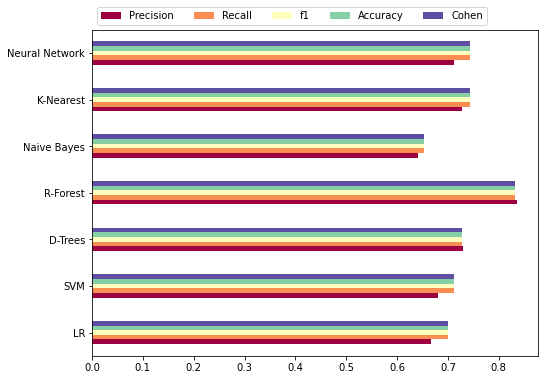

In [72]:
# Now that we have successfully implemented Stratified K Fold and normalizing data, we will try out other binary ML classifiers and output their results in table for better comparison.

# we initialize our dataset in for compfortable working
X = enc_3ql.iloc[:,:-3]
Y = enc_3ql.iloc[:,-1]

# We initialized each model in the first cell and below we will store it by name in a dictionary
models = {}

#Logistic Regression
models['LR'] = LogisticRegression()

# Support Vector Machines
models['SVM'] = LinearSVC()

#Decision Trees
models['D-Trees'] = DecisionTreeClassifier()

# Random Forest
models['R-Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest'] = KNeighborsClassifier()

# Neural Network
models['Neural Network'] = MLPClassifier()

#Now we will create another dictionary to store the evaluation metrics
precision, recall, f1, accuracy, cohen = {}, {}, {}, {}, {}

# Now we create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=17)

#now we will loop over the dataset and the different models. First we will concentrate on the redwine dataset
for key in models.keys():
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

    #Now we scale our input features with normalisation technique
        scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test) 

    #fitting the classifiers on the training data
        models[key].fit(X_train_scaled, Y_train)

    #Let's make predictions  
        predictions = models[key].predict(X_test_scaled)

    #Let's calculate metrics
  
        precision[key] = precision_score(Y_test, predictions,average="weighted")
        recall[key] = recall_score(Y_test, predictions,average='weighted')
        f1[key] = f1_score(Y_test, predictions,average='weighted')
        accuracy[key] = accuracy_score(Y_test, predictions)
        cohen[key] = cohen_kappa_score(Y_test, predictions)
    #Let's create a matrix
        Matrix = ConfusionMatrixDisplay.from_predictions(Y_test, predictions, display_labels= ["high", "low", "medium"] ,colorbar= True, cmap="plasma")
        plt.title(models[key])

    
#we create a pandas frame with the stored metrics
Metrics = pd.DataFrame(index= models.keys(), columns=["Precision", "Recall", "f1", "Accuracy"])
Metrics['Precision'] = precision.values()
Metrics['Recall'] = recall.values()
Metrics['f1'] = accuracy.values()
Metrics['Accuracy'] = accuracy.values()
Metrics['Cohen'] = accuracy.values()

display(Metrics)

# lets visualisze or metrics table
ax = Metrics.plot.barh(figsize= (8,6), cmap="Spectral")
ax.legend(ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10})

plt.show()

In [73]:
# Random Forest performs best out of all the classifiers, gefolgt vom K-Nearest und Decision trees
# High Quality ist am schlechtesten

In [74]:
# Now I check the predictions for 4 labelled content

# now we weill prepare our data for the ML models
#First, I will label encode the quality column

#I will make a copy of the dataset
enc_4ql = ww_4ql.copy()

# Here we define our Encoder and give it an alias
le= LabelEncoder()

# now we transform the quality column variables into ordinal values and add the column to the dataframe
enc_4ql["Encoded"] = le.fit_transform(enc_4ql["quality_label"])

#checking the output of the encoder
display(enc_4ql.sample(5, random_state=42))

# encoded class labels
classes = list(le.classes_)

# now I check the encoded columns
Encoded_freq = enc_4ql["Encoded"].value_counts().to_frame().sort_index()
Encoded_view = Encoded_freq.assign(class_labels=classes)
display(Encoded_view)

# we initialize our dataset in for compfortable working
X_4 = enc_4ql.iloc[:,:-3]
Y_4 = enc_4ql.iloc[:,-1]

# We initialized each model in the first cell and below we will store it by name in a dictionary
models = {}

#Logistic Regression
models['LR'] = LogisticRegression()

# Support Vector Machines
models['SVM'] = LinearSVC()

#Decision Trees
models['D-Trees'] = DecisionTreeClassifier()

# Random Forest
models['R-Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest'] = KNeighborsClassifier()

# Neural Network
models['Neural Network'] = MLPClassifier()

#Now we will create another dictionary to store the evaluation metrics
precision, recall, f1, accuracy, cohen = {}, {}, {}, {}, {}

# Now we create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=17)

#now we will loop over the dataset and the different models. First we will concentrate on the redwine dataset
for key in models.keys():
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

    #Now we scale our input features with normalisation technique
        scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
        X_train_scaled = scaler.transform(X_train) 
        X_test_scaled = scaler.transform(X_test) 

    #fitting the classifiers on the training data
        models[key].fit(X_train_scaled, Y_train)

    #Let's make predictions  
        predictions = models[key].predict(X_test_scaled)

    #Let's calculate metrics
  
        precision[key] = precision_score(Y_test, predictions,average="weighted")
        recall[key] = recall_score(Y_test, predictions,average='weighted')
        f1[key] = f1_score(Y_test, predictions,average='weighted')
        accuracy[key] = accuracy_score(Y_test, predictions)
        cohen[key] = cohen_kappa_score(Y_test, predictions)

    
#we create a pandas frame with the stored metrics
Metrics = pd.DataFrame(index= models.keys(), columns=["Precision", "Recall", "f1", "Accuracy"])
Metrics['Precision'] = precision.values()
Metrics['Recall'] = recall.values()
Metrics['f1'] = accuracy.values()
Metrics['Accuracy'] = accuracy.values()
Metrics['Cohen'] = accuracy.values()

display(Metrics)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,Encoded
4656,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7,high,0
3659,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8,premium,3
907,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8,premium,3
4352,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5,low,1
3271,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7,high,0


,Encoded,class_labels
0,880,high
1,1640,low
2,2198,medium
3,180,premium


/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pete/opt/anaconda3/lib/python3.9/site-packages/sklearn

,Precision,Recall,f1,Accuracy,Cohen
LR,0.667200,0.699571,0.699571,0.699571,0.699571
SVM,0.680546,0.711016,0.711016,0.711016,0.711016
D-Trees,0.743713,0.743920,0.743920,0.743920,0.743920
R-Forest,0.830582,0.826896,0.826896,0.826896,0.826896
Naive Bayes,0.641153,0.652361,0.652361,0.652361,0.652361
K-Nearest,0.727294,0.742489,0.742489,0.742489,0.742489
Neural Network,0.698178,0.728183,0.728183,0.728183,0.728183
